Importing CSV file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


Importing libs

In [2]:
import pandas as pd
import seaborn as sns

Reading CSV file into a Pandas Dataset

In [23]:
salary_data = pd.read_csv("Salary_Data.csv")
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Viewing all dataset columns

In [ ]:
list(salary_data.columns)

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

Looking for a relationship between years of experience and salary

The biggest compensations are between 20-25 years old, maybe when professionals are considerated promising by companies.

This value falls beetwen 27-30, perhaps when professionals are more 'stable' in their careers and it returns to grow after 30, perhaps when they become 'specialists'

<Axes: xlabel='Years of Experience', ylabel='Salary'>

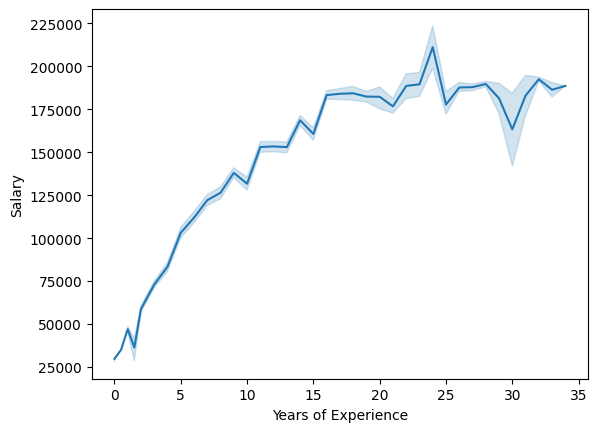

In [ ]:
sns.lineplot(x=salary_data["Years of Experience"], y=salary_data["Salary"])

Viewing predominant job titles (Top 10)

In [ ]:
predominant_roles = salary_data["Job Title"].value_counts().iloc[:10]
predominant_roles

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
Product Manager,313
Full Stack Engineer,309
Marketing Manager,255
Senior Software Engineer,244


Visualization of SWE and Data Scientists salaries throughout their job experience and creating a dataset selecting only SWE and Data Scientists


<Axes: xlabel='Years of Experience', ylabel='Salary'>

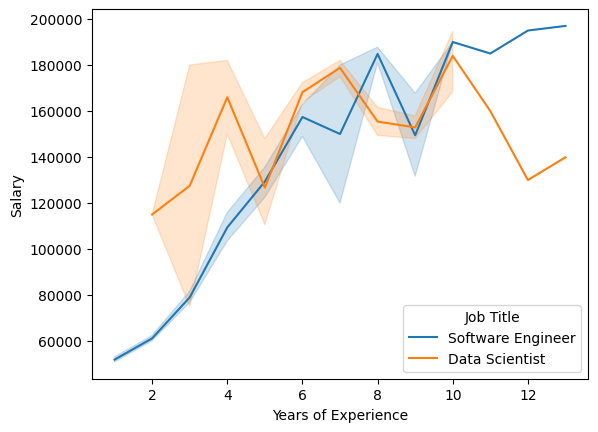

In [ ]:
selected_rows = salary_data[
    (salary_data["Job Title"] == "Software Engineer") |
    (salary_data["Job Title"] == "Data Scientist") & (salary_data["Years of Experience"] <= 13)
]

"""
selected_rows.loc[selected_rows[selected_rows["Job Title"] == "Software Engineer"]["Years of Experience"].idxmax(), "Years of Experience"]
The longest experience of SWEs in this dataset is 13 years, and many Data Scientists have longer than that, so I removed Data Scientists with more than 13 years
"""

sns.lineplot(data=selected_rows, x="Years of Experience", y="Salary", hue="Job Title")


Viewing average salary by education level
- Unifying duplicated education levels with different typing
- Grouping by education level and calcullating average salary




<Axes: xlabel='Education Level', ylabel='Average Salary'>

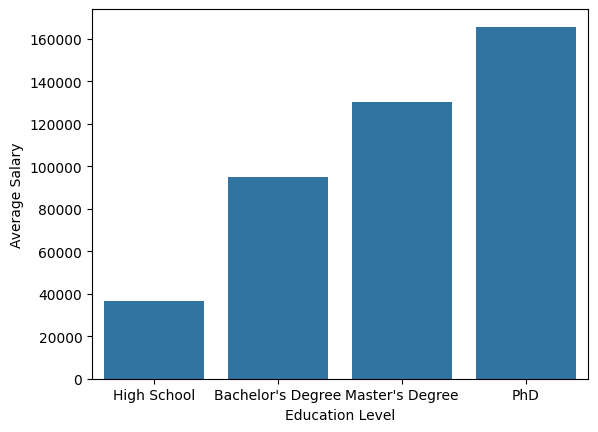

In [37]:
salary_data = salary_data.replace("Master's", "Master's Degree")
salary_data = salary_data.replace("phD", "PhD")
salary_data = salary_data.replace("Bachelor's", "Bachelor's Degree")


# salary_data["Education Level"].value_counts()

avg_salary_by_education = salary_data.groupby(["Education Level"])["Salary"].mean()
new_indexes = ["High School", "Bachelor's Degree", "Master's Degree", "PhD"]
avg_salary_by_education = avg_salary_by_education.reindex(new_indexes)
avg_salary_by_education.name = "Average Salary"
sns.barplot(data=avg_salary_by_education)
